In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mobile Reviews Sentiment - Mobile Reviews Sentiment.csv")

In [5]:
avg_ratings = df.groupby('brand')['rating'].mean().sort_values(ascending=False)

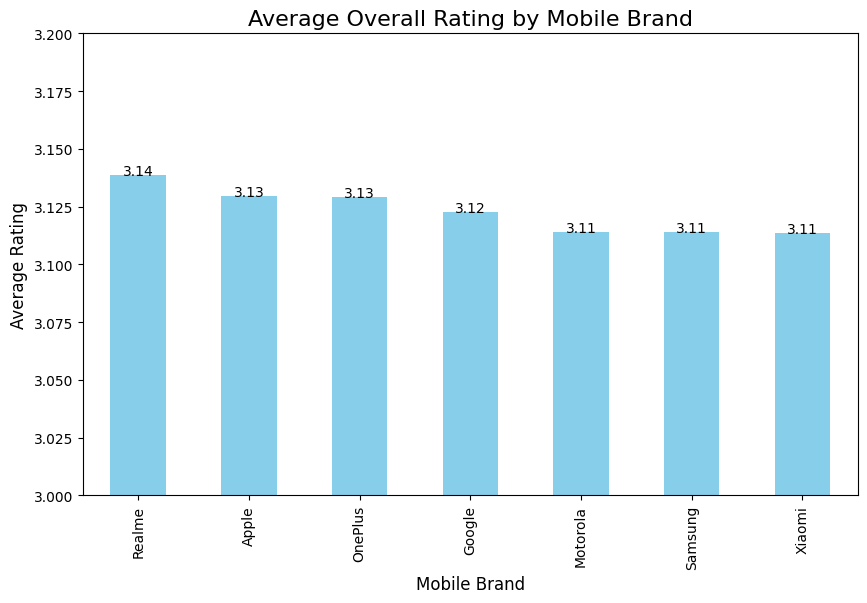

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
bars = avg_ratings.plot(kind='bar', color='skyblue')

plt.ylim(3, 3.2)

plt.title('Average Overall Rating by Mobile Brand', fontsize=16)
plt.xlabel('Mobile Brand', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

for bar in bars.patches:
    rating_value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        rating_value + 0.0,               
        f'{rating_value:.2f}',             
        ha='center',                      
        fontsize=10
    )

plt.show()

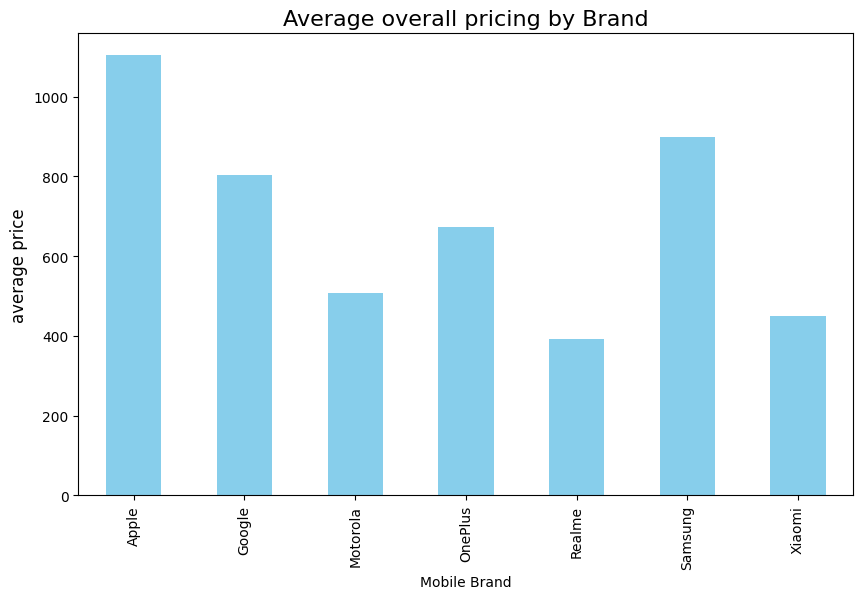

In [8]:
avg_price = df.groupby('brand')['price_usd'].mean()
plt.figure(figsize=(10,6))
bars = avg_price.plot(kind='bar',color='skyblue')

plt.title("Average overall pricing by Brand", fontsize=16)
plt.xlabel('Mobile Brand')
plt.ylabel('average price',fontsize=12)

plt.show()

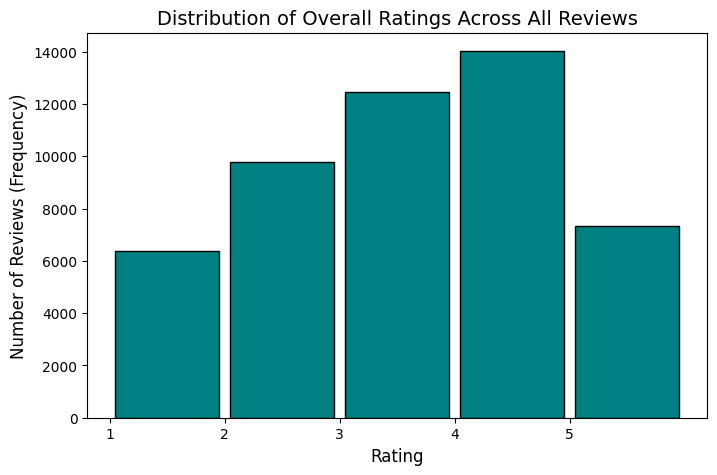

In [9]:
df_ratings = df['rating'].dropna()

plt.figure(figsize=(8,5))

min_rating = int(df['rating'].min())
max_rating = int(df['rating'].max())

bins = [i for i in range(min_rating,max_rating+2)]

hist = plt.hist(df_ratings,bins=bins,edgecolor='black', color = 'teal',rwidth=0.9)

plt.xticks(range(min_rating, max_rating + 1))

plt.title('Distribution of Overall Ratings Across All Reviews', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews (Frequency)', fontsize=12)

plt.show()

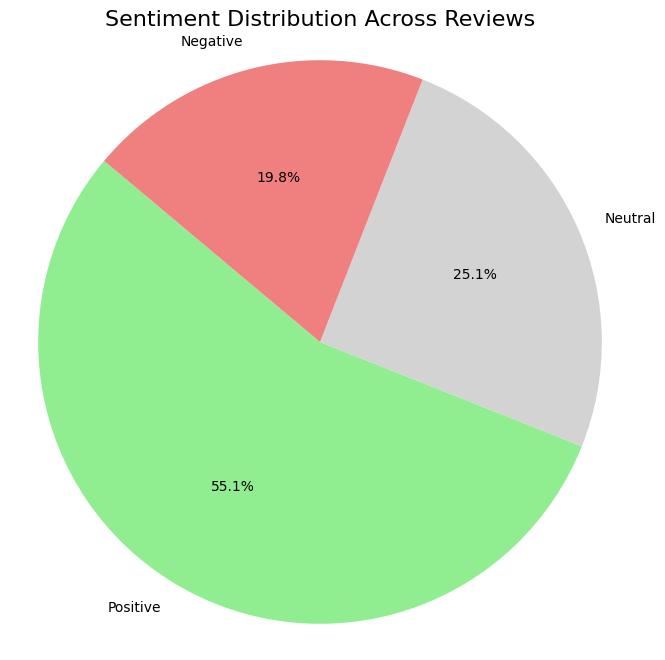

In [10]:
sentiment_counts = df['sentiment'].value_counts()
colors = {
    'positive': 'lightgreen',
    'neutral': 'lightgray',
    'negative': 'lightcoral'
}


labels = ['positive', 'neutral', 'negative']
ordered_colors = [colors[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=ordered_colors)
plt.title('Sentiment Distribution Across Reviews', fontsize=16)
plt.axis('equal') 
plt.show()

In [11]:
overall_mean_price = df['price_usd'].mean()
overall_mean_rating = df['rating'].mean()
print(f"Overall Mean Price (USD): {overall_mean_price:.2f}")
print(f"Overall Mean Rating: {overall_mean_rating:.2f}")

Overall Mean Price (USD): 689.69
Overall Mean Rating: 3.12


In [12]:
overpriced_models_df = df[(df['price_usd'] > overall_mean_price) & (df['rating'] < overall_mean_rating)]
print("Overpriced Models (first 5 rows):")
print(overpriced_models_df.head())

Overpriced Models (first 5 rows):
    review_id         customer_name  age     brand           model  price_usd  \
4           5             Yago Leão   38  Motorola         Edge 50     792.13   
7           8          James Howard   39     Apple       iPhone SE    1443.76   
14         15    Ms Hollie Phillips   39   Samsung  Galaxy Note 20    1146.49   
20         21  Charles Kelly-Morley   46     Apple       iPhone SE    1470.12   
24         25     Shannon Hernandez   27     Apple   iPhone 15 Pro     997.61   

   price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
4    R$4515.14      BRL                  5.70       3  ...              True   
7    A$2208.95      AUD                  1.53       2  ...              True   
14     £894.26      GBP                  0.78       3  ...              True   
20    £1146.69      GBP                  0.78       1  ...             False   
24     $997.61      USD                  1.00       3  ...              True   

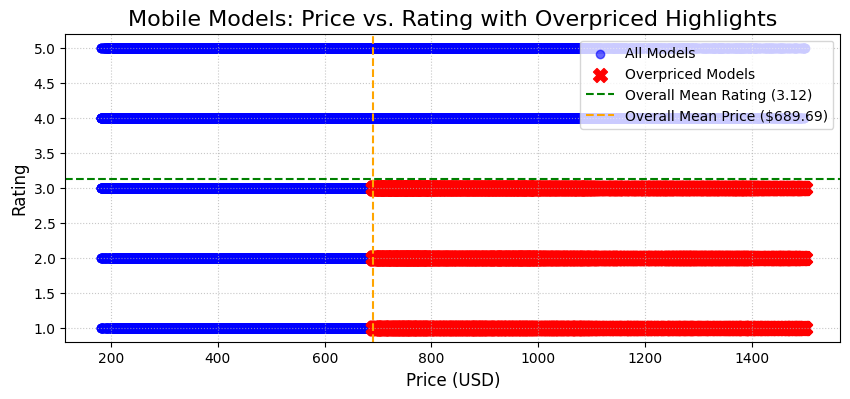

In [13]:
plt.figure(figsize=(10, 4))

plt.scatter(df['price_usd'], df['rating'], color='blue', alpha=0.6, label='All Models')

plt.scatter(overpriced_models_df['price_usd'], overpriced_models_df['rating'], color='red', marker='X', s=100, label='Overpriced Models')

plt.axhline(y=overall_mean_rating, color='green', linestyle='--', label=f'Overall Mean Rating ({overall_mean_rating:.2f})')

plt.axvline(x=overall_mean_price, color='orange', linestyle='--', label=f'Overall Mean Price (${overall_mean_price:.2f})')

plt.title('Mobile Models: Price vs. Rating with Overpriced Highlights', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

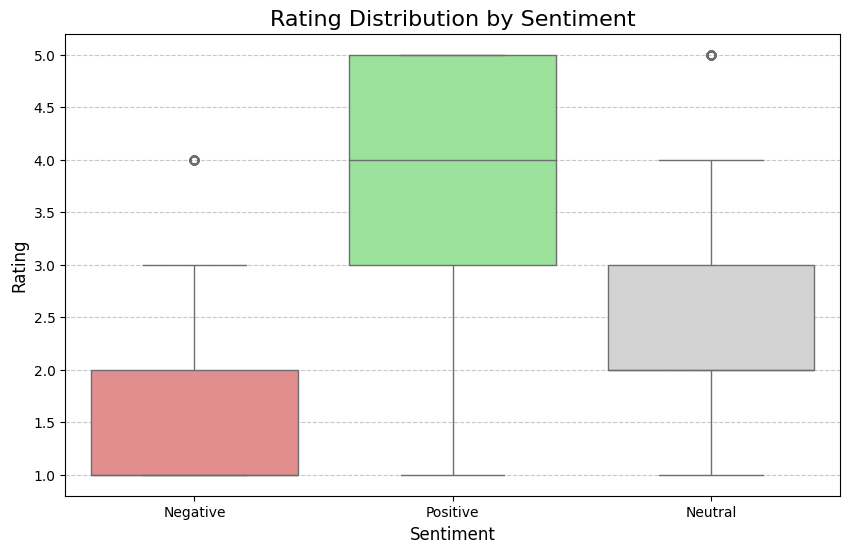

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='rating', data=df, palette={'Positive': 'lightgreen', 'Neutral': 'lightgray', 'Negative': 'lightcoral'}, hue='sentiment', legend=False)
plt.title('Rating Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()